# ***Project : Speech Emotion Recognition***

<hr color="blue">

##<font color="#8accf1"> ***Step 5 : Transformation of Audio Signals into Numerical Features***</font>

###<font color="#8aecf1">***5.1. Characterization of Audio Samples: MFCCs, Chroma, and Spectral Contrast***</font>

In [ ]:
# Path to your audio dataset
data_audio_path = '/content/audio_data'

# Initialize lists to store data
data = []

# Loop through each emotion directory
for emotion_dir in os.listdir(data_audio_path):
    emotion_path = os.path.join(data_audio_path, emotion_dir)
    if os.path.isdir(emotion_path):
        # List audio files
        audio_files = [f for f in os.listdir(emotion_path) if f.endswith('.wav')]
        for file in audio_files:
            file_path = os.path.join(emotion_path, file)

            # Load audio file
            y, sr = librosa.load(file_path, sr=None)

            # Extract MFCCs
            mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
            mfccs_mean = np.mean(mfccs, axis=1)

            # Extract Chroma features
            chroma = librosa.feature.chroma_stft(y=y, sr=sr)
            chroma_mean = np.mean(chroma, axis=1)

            # Extract Spectral Contrast
            spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
            spectral_contrast_mean = np.mean(spectral_contrast, axis=1)

            # Append the data
            data.append({
                'file_path': file_path,
                'emotion': emotion_dir,
                'mfccs': mfccs_mean,
                'chroma': chroma_mean,
                'spectral_contrast': spectral_contrast_mean
            })

# Create DataFrame
df_features = pd.DataFrame(data)

In [ ]:
df_features.head(4)

,file_path,emotion,mfccs,chroma,spectral_contrast
0,/content/audio_data/Disgust/03-01-07-01-01-02-...,Disgust,"[-599.54926, 92.874214, -7.4754333, 0.46309176...","[0.43410978, 0.44791436, 0.43757415, 0.4549346...","[19.572676439169825, 13.485697135490957, 15.76..."
1,/content/audio_data/Disgust/03-01-07-02-02-01-...,Disgust,"[-539.41565, 84.70197, -15.393779, 4.0404625, ...","[0.4995695, 0.41822702, 0.33099994, 0.33225054...","[15.572103002695538, 14.242517679299329, 15.23..."
2,/content/audio_data/Disgust/03-01-07-02-01-02-...,Disgust,"[-565.1239, 83.03995, -17.59674, 10.072682, -6...","[0.47175345, 0.42694184, 0.38374746, 0.4027872...","[12.999377951028892, 13.23261819564754, 13.965..."
3,/content/audio_data/Disgust/03-01-07-02-01-01-...,Disgust,"[-608.7009, 89.63527, -10.174391, 5.84544, -12...","[0.51460487, 0.53913456, 0.45219964, 0.4396915...","[14.800914992259292, 10.001244705348046, 13.36..."


In [ ]:
df_features.tail(4)

,file_path,emotion,mfccs,chroma,spectral_contrast
1436,/content/audio_data/Angry/03-01-05-02-02-01-13...,Angry,"[-381.7702, 61.168194, -25.30509, 9.693282, -1...","[0.44695857, 0.5190689, 0.6259411, 0.5880267, ...","[15.187943391509545, 14.187222687571795, 16.42..."
1437,/content/audio_data/Angry/03-01-05-01-02-01-24...,Angry,"[-524.81116, 67.4226, -18.039516, 4.515624, -4...","[0.4410979, 0.35629252, 0.3220998, 0.40817615,...","[12.764329606801661, 14.051071253501535, 16.36..."
1438,/content/audio_data/Angry/03-01-05-02-01-02-15...,Angry,"[-438.5453, 79.071976, -10.851633, 5.9966297, ...","[0.44713423, 0.42673388, 0.43192738, 0.4772061...","[15.36746524287846, 13.799831751874729, 15.236..."
1439,/content/audio_data/Angry/03-01-05-02-01-01-17...,Angry,"[-438.1236, 77.47163, -12.134581, 5.499308, 8....","[0.50137115, 0.5329214, 0.5252467, 0.5945176, ...","[16.344373026868176, 11.901799014820192, 14.12..."


In [ ]:
df_features.shape

(1440, 5)

###<font color="#8aecf1">***5.2. Conversion of Extracted Features and Label Encoding***</font>

In [ ]:
# Convert lists to NumPy arrays
df_features['mfccs'] = df_features['mfccs'].apply(lambda x: np.array(x))
df_features['chroma'] = df_features['chroma'].apply(lambda x: np.array(x))
df_features['spectral_contrast'] = df_features['spectral_contrast'].apply(lambda x: np.array(x))

# Convert features to NumPy matrices
X_mfccs = np.array(df_features['mfccs'].tolist())
X_chroma = np.array(df_features['chroma'].tolist())
X_spectral_contrast = np.array(df_features['spectral_contrast'].tolist())

# Convert emotions into numerical labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_features['emotion'])


In [ ]:
print("Dimensions of MFCCs:", X_mfccs.shape) # Check dimensions
print("Chroma dimensions:", X_chroma.shape)
print("Dimensions of Spectral Contrast:", X_spectral_contrast.shape)

Dimensions of MFCCs: (1440, 13)
Chroma dimensions: (1440, 12)
Dimensions of Spectral Contrast: (1440, 7)


In [ ]:
print("First MFCCs:", X_mfccs[0]) #Show first lines
print("Type of Chroma:", type(X_chroma))
print("Type of Spectral Contrast:", type(X_spectral_contrast))
print("Type of labels:", type(y))

First MFCCs: [-5.9954926e+02  9.2874214e+01 -7.4754333e+00  4.6309176e-01
 -6.3779526e+00  9.2267504e+00 -1.4507468e+01 -4.9092917e+00
 -1.0526999e+01 -5.1071091e+00 -1.0373907e+01 -8.3101835e+00
  4.6817956e+00]
Type of Chroma: <class 'numpy.ndarray'>
Type of Spectral Contrast: <class 'numpy.ndarray'>
Type of labels: <class 'numpy.ndarray'>


<hr color="blue">

##<font color="#8accf1"> ***Step 6 : The model***</font>

###<font color="#8aecf1">***6.1. Data preparation***</font>

In [ ]:
# Combine all feature matrices
X = np.concatenate([X_mfccs, X_chroma, X_spectral_contrast], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


###<font color="#8aecf1">***6.2. Training the RandomForest model***</font>

In [ ]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on scaled training data
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

###<font color="#8aecf1">***6.3. Evaluating the model***</font>

Classification Report:
               precision    recall  f1-score   support

       Angry       0.68      0.71      0.69        38
        Calm       0.55      0.70      0.61        43
     Disgust       0.46      0.52      0.48        31
     Fearful       0.39      0.41      0.40        37
       Happy       0.78      0.57      0.66        44
     Neutral       0.35      0.43      0.39        14
         Sad       0.63      0.48      0.54        46
   Surprised       0.64      0.66      0.65        35

    accuracy                           0.57       288
   macro avg       0.56      0.56      0.55       288
weighted avg       0.58      0.57      0.57       288

Confusion Matrix:
 [[27  2  3  0  3  0  0  3]
 [ 0 30  1  1  0  5  5  1]
 [ 3  2 16  4  0  2  1  3]
 [ 6  3  6 15  1  0  4  2]
 [ 1  5  0 11 25  0  1  1]
 [ 0  3  2  0  0  6  2  1]
 [ 1  8  0  7  2  4 22  2]
 [ 2  2  7  0  1  0  0 23]]


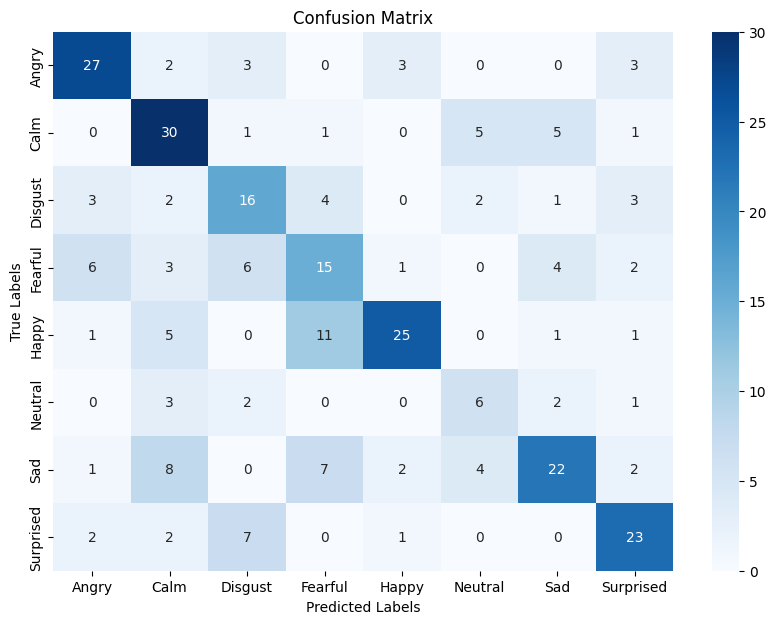

In [ ]:
# Make predictions on scaled test data
y_pred = rf_model.predict(X_test_scaled)

# Calculate metrics
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)
# Fit the model on training data
svm_model.fit(X_train_scaled, y_train)


SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# Predict on test data
y_pred = svm_model.predict(X_test_scaled)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70        38
           1       0.53      0.72      0.61        43
           2       0.31      0.42      0.36        31
           3       0.49      0.49      0.49        37
           4       0.62      0.45      0.53        44
           5       0.27      0.29      0.28        14
           6       0.38      0.35      0.36        46
           7       0.55      0.34      0.42        35

    accuracy                           0.49       288
   macro avg       0.48      0.47      0.47       288
weighted avg       0.50      0.49      0.49       288

Confusion Matrix:
 [[27  0  3  1  1  0  4  2]
 [ 0 31  2  1  0  5  4  0]
 [ 4  3 13  4  0  1  3  3]
 [ 3  3  4 18  2  0  5  2]
 [ 3  3  4  8 20  0  5  1]
 [ 0  4  1  0  0  4  4  1]
 [ 1 13  4  2  6  3 16  1]
 [ 1  2 11  3  3  2  1 12]]


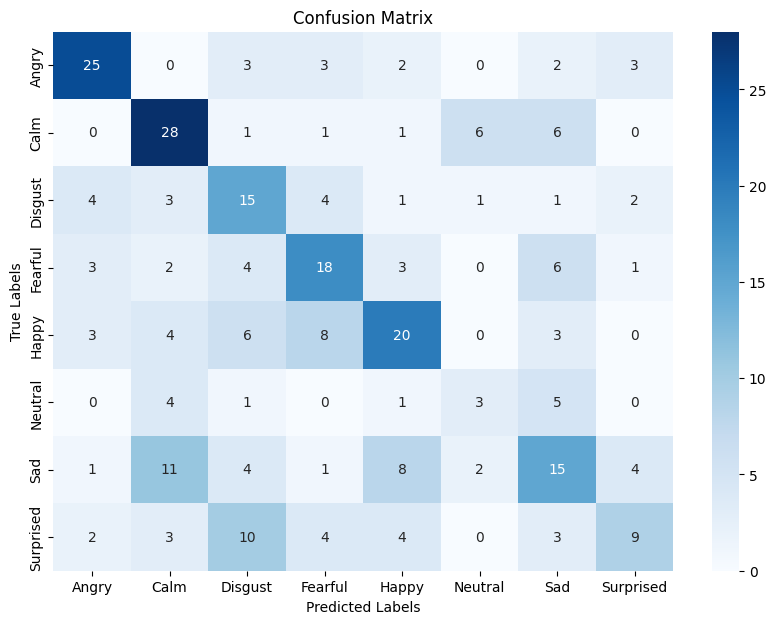

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

*********************